<a href="https://colab.research.google.com/github/moulimandal/POVERTY-LEVEL-PREDICTION/blob/main/extream_Poverty_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read dataset

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Untitled folder/train.csv')
#test = pd.read_csv('/content/drive/MyDrive/Datasets/poverty_test.csv')
#y_test = pd.read_csv('/content/drive/MyDrive/Datasets/sample_submission (1).csv')

In [ ]:
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [ ]:
train.shape

(9557, 143)

In [ ]:
#pd.set_option('display.max_rows' ,None)
#pd.set_option('display.max_columns' ,None)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [ ]:
train.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


In [ ]:
train.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=143)

In [ ]:
#train_df = train.drop(['Id'],axis=1)
#train_df.head()

In [ ]:
train_df = train.copy()
#test_df = test.copy()

# Missing values on train set





In [ ]:
# missing values in train set
train_df.isnull().sum()

Id                    0
v2a1               6860
hacdor                0
rooms                 0
hacapo                0
                   ... 
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
agesq                 0
Target                0
Length: 143, dtype: int64

In [ ]:
# percentage of missing values
percent_missing = train.isnull().sum() * 100 / len(train)
percent_missing = percent_missing[percent_missing>0]
missing_value_df = pd.DataFrame({'column_name': percent_missing.index,'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
v2a1,v2a1,71.779847
v18q1,v18q1,76.823271
rez_esc,rez_esc,82.954902
meaneduc,meaneduc,0.052318
SQBmeaned,SQBmeaned,0.052318


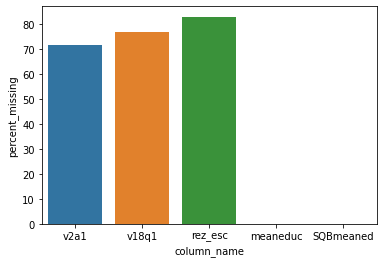

In [ ]:
ax = sns.barplot(x='column_name',y='percent_missing',data = missing_value_df)

In [ ]:
# drop columns having more than 70 percent missing values
train_df = train_df.drop(['v2a1','v18q1','rez_esc'],axis=1)

In [ ]:
train_df['SQBmeaned'] = train_df['SQBmeaned'].fillna(train_df['SQBmeaned'].median())
train_df['meaneduc'] = train_df['meaneduc'].fillna(train_df['meaneduc'].median())

#train_df = train_df.drop(['SQBmeaned','meaneduc'],axis=1)

In [ ]:
#train_df = train_df.drop(['Id'],axis=1)

In [ ]:
train_df.head()

,Id,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,0,3,0,1,1,0,0,1,1,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,0,4,0,1,1,1,0,1,1,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,0,8,0,1,1,0,0,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,0,5,0,1,1,1,0,2,2,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,0,5,0,1,1,1,0,2,2,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


# Find categorical and numerical column

In [ ]:
# columns with numerical data
num_cols = train_df.select_dtypes("number").columns
num_cols

Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=135)

In [ ]:
# columns with categorical data
cat_cols = train_df.select_dtypes("object").columns
cat_cols

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

**Drop columns with id and categorical cols**

In [ ]:
# as the column contains id 
train_df = train_df.drop(['idhogar'],axis=1)

In [ ]:
train_df = train_df.drop(['dependency','edjefe','edjefa'],axis=1)

In [ ]:
train.dependency.value_counts()

yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             378
.25           260
3             236
4             100
.75            98
.2             90
.40000001      84
1.3333334      84
2.5            77
5              24
1.25           18
3.5            18
.80000001      18
2.25           13
.71428573      12
1.75           11
1.2            11
.83333331      11
.22222222      11
.2857143        9
1.6666666       8
.60000002       8
6               7
.16666667       7
Name: dependency, dtype: int64

# Boxplot of each columns

In [ ]:
#plt.rcParams['figure.max_open_warning'] = 2000 # default is 20
#df1=train_df.select_dtypes(exclude=['object'])

#for column in train_df:
  #plt.figure(figsize=(10,1))
  #sns.boxplot(data=train_df, x=column)
  #sns.boxplot(x=column, data=X)

# Correlation

In [ ]:

#X.corr()

# Target value plot

In [ ]:
train_df['Target'].value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


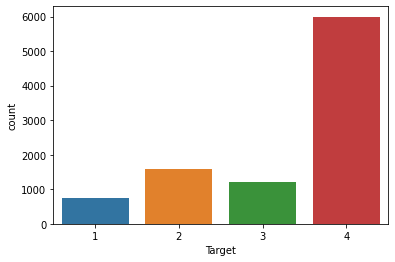

In [ ]:
sns.countplot(train_df.Target)

# split train dataset for training and testing

In [ ]:
#X = train_df.iloc[:,1:-1]
X = train_df.iloc[:,:-1]
y = train_df.iloc[:,-1:]

**split train set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train_T_change, X_test_T_change, y_train_T, y_test_T = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train_T_change.head(5)

,Id,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
2667,ID_d79548ae2,0,3,0,1,1,0,0,1,1,...,2,0,4,16,121,1,4.000000,0.111111,144.000000,4
1533,ID_067f89f3c,0,5,0,1,1,0,0,1,1,...,60,25,3600,4,0,0,0.444444,0.000000,30.250000,3600
5227,ID_05a3b0997,0,6,0,1,1,0,0,2,2,...,64,16,4096,9,16,0,1.000000,0.250000,40.111115,4096
1259,ID_aa9b4e41c,0,5,0,1,1,0,0,1,1,...,57,121,3249,4,256,0,1.000000,0.000000,182.250000,3249
4507,ID_77285cab6,0,7,0,1,1,0,0,2,2,...,17,64,289,16,0,4,1.000000,1.000000,81.000000,289


In [ ]:
X_train_T = X_train_T_change.iloc[:,1:]
X_test_T = X_test_T_change.iloc[:,1:]

In [ ]:
X_train_T.head(5)

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
2667,0,3,0,1,1,0,0,1,1,1,...,2,0,4,16,121,1,4.000000,0.111111,144.000000,4
1533,0,5,0,1,1,0,0,1,1,0,...,60,25,3600,4,0,0,0.444444,0.000000,30.250000,3600
5227,0,6,0,1,1,0,0,2,2,0,...,64,16,4096,9,16,0,1.000000,0.250000,40.111115,4096
1259,0,5,0,1,1,0,0,1,1,0,...,57,121,3249,4,256,0,1.000000,0.000000,182.250000,3249
4507,0,7,0,1,1,0,0,2,2,0,...,17,64,289,16,0,4,1.000000,1.000000,81.000000,289


In [ ]:
print(X_train_T.shape)
print(X_test_T.shape)
print(y_train_T.shape)
print(y_test_T.shape)

(7645, 134)
(1912, 134)
(7645, 1)
(1912, 1)


In [ ]:
#feature scaling on training data
from sklearn.preprocessing import MinMaxScaler
#scaler = StandardScaler()
scaler = MinMaxScaler()
X_train_sca_T = scaler.fit_transform(X_train_T)
X_test_sca_T = scaler.transform(X_test_T) 
#print(X_train_sca_T)

In [ ]:
from sklearn import tree
#training
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_sca_T,y_train_T)

# making predictions on the testing set
y_pred_dt = clf.predict(X_test_sca_T)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Decision Tree model accuracy(in %):", metrics.accuracy_score(y_test_T, y_pred_dt)*100)

print(metrics.classification_report(y_test_T, y_pred_dt))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_T,y_pred_dt)

Decision Tree model accuracy(in %): 91.63179916317992
              precision    recall  f1-score   support

           1       0.82      0.79      0.80       151
           2       0.87      0.89      0.88       331
           3       0.83      0.86      0.85       246
           4       0.96      0.95      0.96      1184

    accuracy                           0.92      1912
   macro avg       0.87      0.87      0.87      1912
weighted avg       0.92      0.92      0.92      1912



array([[ 119,   14,    3,   15],
       [  11,  293,   11,   16],
       [   4,   12,  212,   18],
       [  12,   16,   28, 1128]])

In [ ]:
np.unique(y_pred_dt,return_counts=True)

(array([1, 2, 3, 4]), array([ 146,  335,  254, 1177]))

In [ ]:
sub = pd.DataFrame(data=X_test_T_change)
sub['pred'] = y_pred_dt
sub.head() 

,Id,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,pred
4319,ID_c9fdb7266,0,6,0,1,1,0,0,2,2,...,121,625,16,0,1,1.777778,0.111111,87.111107,625,4
3883,ID_fd6cc8def,0,4,0,1,1,1,0,0,0,...,196,3249,4,0,0,1.000000,0.000000,196.000000,3249,4
3775,ID_85d5cd65c,0,4,0,1,1,1,1,1,2,...,225,1521,16,225,4,4.000000,1.000000,240.250000,1521,4
1519,ID_c230376ae,0,5,0,1,1,1,0,1,1,...,144,361,9,0,4,1.000000,4.000000,784.000000,361,4
8810,ID_991b84866,0,4,0,1,1,0,1,1,2,...,25,121,16,81,4,4.000000,1.000000,90.250000,121,2


In [ ]:
sub[sub.pred==1]

,Id,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,pred
5790,ID_b6889eed0,0,3,0,1,1,0,0,1,1,...,121,3364,9,0,1,9.000000,0.250000,225.000000,3364,1
2149,ID_451742b35,0,5,0,1,0,1,2,0,2,...,4,81,36,0,9,4.000000,1.000000,44.444443,81,1
4849,ID_2a0c11fb2,0,4,0,1,1,0,1,1,2,...,64,196,9,0,4,2.250000,4.000000,36.000000,196,1
6711,ID_1e22cdf6c,1,6,0,1,1,0,1,0,1,...,0,9,49,0,36,12.250000,36.000000,121.000000,9,1
7986,ID_e56fb7a42,1,3,0,1,0,0,0,2,2,...,36,169,16,0,9,16.000000,9.000000,169.000000,169,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7268,ID_d5442184e,0,6,0,1,1,1,0,0,0,...,1,64,25,0,16,2.777778,16.000000,121.000000,64,1
5438,ID_47a3ae0ac,1,5,0,1,1,0,2,1,3,...,4,2704,100,49,16,11.111111,0.444444,32.111111,2704,1
4225,ID_466758685,0,3,0,1,1,0,0,0,0,...,121,324,4,0,1,1.000000,1.000000,484.000000,324,1
3009,ID_ef9860d6a,0,8,0,1,1,1,1,3,4,...,121,1600,36,121,16,2.250000,4.000000,81.000000,1600,1


In [ ]:
from sklearn import svm
clf_svm = svm.SVC(kernel='rbf')
clf_svm.fit(X_train_sca_T,y_train_T)

y_pred_svm = clf_svm.predict(X_test_sca_T)

from sklearn import metrics
print("SVM model accuracy(in %):", metrics.accuracy_score(y_test_T, y_pred_svm)*100)

print(metrics.classification_report(y_test_T, y_pred_svm))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_T,y_pred_svm)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM model accuracy(in %): 71.07740585774059
              precision    recall  f1-score   support

           1       0.89      0.22      0.35       151
           2       0.59      0.38      0.46       331
           3       0.97      0.13      0.24       246
           4       0.72      0.99      0.83      1184

    accuracy                           0.71      1912
   macro avg       0.79      0.43      0.47      1912
weighted avg       0.74      0.71      0.65      1912



array([[  33,   39,    1,   78],
       [   0,  125,    0,  206],
       [   4,   32,   33,  177],
       [   0,   16,    0, 1168]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=200,random_state=0)
rf_clf = rf_clf.fit(X_train_sca_T,y_train_T)

y_pred_rf = rf_clf.predict(X_test_sca_T)

from sklearn import metrics
print("RF model accuracy(in %):", metrics.accuracy_score(y_test_T, y_pred_rf)*100)

print(metrics.classification_report(y_test_T, y_pred_rf))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_T,y_pred_rf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RF model accuracy(in %): 91.57949790794979
              precision    recall  f1-score   support

           1       0.95      0.72      0.82       151
           2       0.92      0.83      0.87       331
           3       0.96      0.77      0.85       246
           4       0.90      0.99      0.95      1184

    accuracy                           0.92      1912
   macro avg       0.93      0.83      0.87      1912
weighted avg       0.92      0.92      0.91      1912



array([[ 109,   13,    0,   29],
       [   5,  275,    5,   46],
       [   1,    7,  189,   49],
       [   0,    3,    3, 1178]])

In [ ]:
np.unique(y_pred_svm,return_counts=True)

(array([1, 2, 3, 4]), array([  37,  212,   34, 1629]))

In [ ]:
np.unique(y_pred_rf,return_counts=True)

(array([1, 2, 3, 4]), array([ 115,  298,  197, 1302]))

**check dataset imbalanced or not if it is imbalanced then use smote**

In [ ]:
y_train_T.value_counts()

Target
4         4812
2         1266
3          963
1          604
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


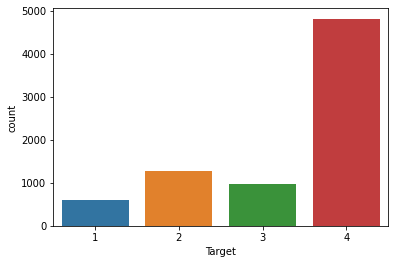

In [ ]:
sns.countplot(y_train_T.Target)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_T, y_train_T)

In [ ]:
X_train_sm.shape

(19248, 134)

In [ ]:
y_train_sm.value_counts()

Target
1         4812
2         4812
3         4812
4         4812
dtype: int64

In [ ]:
print(X_train_sm.shape)
print(y_train_sm.shape)

(19248, 134)
(19248, 1)


**Scaling**

In [ ]:
#feature scaling on training data
from sklearn.preprocessing import MinMaxScaler
#scaler = StandardScaler()
scaler = MinMaxScaler()
X_train_sca_T = scaler.fit_transform(X_train_sm)
X_test_sca_T = scaler.transform(X_test_T) 
#print(X_train_sca_T)

**Dtree**

In [ ]:
from sklearn import tree
#training
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_sca_T,y_train_sm)

# making predictions on the testing set
y_pred_dt_sm = clf.predict(X_test_sca_T)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Decision Tree model accuracy(in %):", metrics.accuracy_score(y_test_T, y_pred_dt_sm)*100)

print(metrics.classification_report(y_test_T, y_pred_dt_sm))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_T,y_pred_dt_sm)

Decision Tree model accuracy(in %): 90.11506276150628
              precision    recall  f1-score   support

           1       0.78      0.77      0.78       151
           2       0.83      0.86      0.84       331
           3       0.79      0.85      0.82       246
           4       0.97      0.94      0.95      1184

    accuracy                           0.90      1912
   macro avg       0.84      0.86      0.85      1912
weighted avg       0.90      0.90      0.90      1912



array([[ 117,   15,    9,   10],
       [  15,  286,   17,   13],
       [   4,   16,  210,   16],
       [  14,   29,   31, 1110]])

In [ ]:
np.unique(y_pred_dt_sm,return_counts=True)

(array([1, 2, 3, 4]), array([ 150,  346,  267, 1149]))

**SVM**

In [ ]:
from sklearn import svm
clf_svm = svm.SVC(kernel='rbf')
clf_svm.fit(X_train_sca_T,y_train_sm)

y_pred_svm_sm = clf_svm.predict(X_test_sca_T)

from sklearn import metrics
print("SVM model accuracy(in %):", metrics.accuracy_score(y_test_T, y_pred_svm_sm)*100)

print(metrics.classification_report(y_test_T, y_pred_svm_sm))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_T,y_pred_svm_sm)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM model accuracy(in %): 72.38493723849372
              precision    recall  f1-score   support

           1       0.71      0.29      0.41       151
           2       0.68      0.37      0.48       331
           3       0.83      0.21      0.34       246
           4       0.73      0.98      0.84      1184

    accuracy                           0.72      1912
   macro avg       0.73      0.47      0.52      1912
weighted avg       0.73      0.72      0.68      1912



array([[  44,   25,    4,   78],
       [  10,  124,    4,  193],
       [   6,   19,   52,  169],
       [   2,   15,    3, 1164]])

In [ ]:
np.unique(y_pred_svm_sm,return_counts=True)

(array([1, 2, 3, 4]), array([  62,  183,   63, 1604]))

**RFC**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=200,random_state=0)
rf_clf = rf_clf.fit(X_train_sca_T,y_train_sm)

y_pred_rf_sm = rf_clf.predict(X_test_sca_T)

from sklearn import metrics
print("RF model accuracy(in %):", metrics.accuracy_score(y_test_T, y_pred_rf_sm)*100)

print(metrics.classification_report(y_test_T, y_pred_rf_sm))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_T,y_pred_rf_sm)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RF model accuracy(in %): 92.88702928870293
              precision    recall  f1-score   support

           1       0.92      0.77      0.84       151
           2       0.92      0.86      0.89       331
           3       0.93      0.83      0.88       246
           4       0.93      0.99      0.96      1184

    accuracy                           0.93      1912
   macro avg       0.92      0.86      0.89      1912
weighted avg       0.93      0.93      0.93      1912



array([[ 117,   15,    1,   18],
       [   8,  284,    7,   32],
       [   1,    7,  204,   34],
       [   1,    4,    8, 1171]])

In [ ]:
np.unique(y_pred_rf_sm,return_counts=True)

(array([1, 2, 3, 4]), array([ 127,  310,  220, 1255]))

In [ ]:
sub = pd.DataFrame(data=X_test_T_change)
sub['pred'] = y_pred_rf_sm
sub.head() 

,Id,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,pred
4319,ID_c9fdb7266,0,6,0,1,1,0,0,2,2,...,121,625,16,0,1,1.777778,0.111111,87.111107,625,4
3883,ID_fd6cc8def,0,4,0,1,1,1,0,0,0,...,196,3249,4,0,0,1.000000,0.000000,196.000000,3249,4
3775,ID_85d5cd65c,0,4,0,1,1,1,1,1,2,...,225,1521,16,225,4,4.000000,1.000000,240.250000,1521,4
1519,ID_c230376ae,0,5,0,1,1,1,0,1,1,...,144,361,9,0,4,1.000000,4.000000,784.000000,361,4
8810,ID_991b84866,0,4,0,1,1,0,1,1,2,...,25,121,16,81,4,4.000000,1.000000,90.250000,121,2


In [ ]:
sub[sub.pred==1]

,Id,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,pred
5790,ID_b6889eed0,0,3,0,1,1,0,0,1,1,...,121,3364,9,0,1,9.000000,0.250000,225.000000,3364,1
2149,ID_451742b35,0,5,0,1,0,1,2,0,2,...,4,81,36,0,9,4.000000,1.000000,44.444443,81,1
4849,ID_2a0c11fb2,0,4,0,1,1,0,1,1,2,...,64,196,9,0,4,2.250000,4.000000,36.000000,196,1
6711,ID_1e22cdf6c,1,6,0,1,1,0,1,0,1,...,0,9,49,0,36,12.250000,36.000000,121.000000,9,1
7986,ID_e56fb7a42,1,3,0,1,0,0,0,2,2,...,36,169,16,0,9,16.000000,9.000000,169.000000,169,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5438,ID_47a3ae0ac,1,5,0,1,1,0,2,1,3,...,4,2704,100,49,16,11.111111,0.444444,32.111111,2704,1
4225,ID_466758685,0,3,0,1,1,0,0,0,0,...,121,324,4,0,1,1.000000,1.000000,484.000000,324,1
3009,ID_ef9860d6a,0,8,0,1,1,1,1,3,4,...,121,1600,36,121,16,2.250000,4.000000,81.000000,1600,1
6252,ID_033a051b2,0,3,0,1,1,0,0,1,1,...,4,3249,1,4,0,0.250000,0.000000,4.000000,3249,1


**FS**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
anova_filter = SelectKBest(f_classif, k=30)
X_trainT = anova_filter.fit_transform(X_train_T, y_train_T)
X_testT = anova_filter.transform(X_test_T)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [58] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [ ]:
anova_filter.get_support(1)

array([  0,   1,   5,   6,   9,  12,  17,  19,  27,  28,  37,  60,  62,
        63,  65,  66,  67,  68,  91,  95, 103, 106, 112, 115, 116, 125,
       128, 129, 130, 132])

In [ ]:
anova_filter.get_feature_names_out()

array(['hacdor', 'rooms', 'v18q', 'r4h1', 'r4m1', 'r4t1', 'escolari',
       'paredblolad', 'pisomoscer', 'pisocemento', 'cielorazo', 'epared1',
       'epared3', 'etecho1', 'etecho3', 'eviv1', 'eviv2', 'eviv3',
       'hogar_nin', 'meaneduc', 'instlevel8', 'overcrowding', 'computer',
       'qmobilephone', 'lugar1', 'SQBescolari', 'SQBedjefe',
       'SQBhogar_nin', 'SQBovercrowding', 'SQBmeaned'], dtype=object)

**smote**

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_sm, y_train_sm = sm.fit_resample(X_trainT, y_train_T)

**scale**

In [ ]:
#feature scaling on training data
from sklearn.preprocessing import MinMaxScaler
#scaler = StandardScaler()
scaler = MinMaxScaler()
X_train_sca_fs = scaler.fit_transform(X_train_sm)
X_test_sca_fs = scaler.transform(X_testT) 
#print(X_train_sca_fs)

**model**

In [ ]:
from sklearn import tree

#training
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_sca_fs,y_train_sm)

# making predictions on the testing set
y_pred_dt_fs = clf.predict(X_test_sca_fs)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Decision Tree model accuracy(in %):", metrics.accuracy_score(y_test_T, y_pred_dt_fs)*100)

print(metrics.classification_report(y_test_T, y_pred_dt_fs))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_T,y_pred_dt_fs)

Decision Tree model accuracy(in %): 92.10251046025104
              precision    recall  f1-score   support

           1       0.86      0.80      0.83       151
           2       0.85      0.90      0.87       331
           3       0.82      0.88      0.85       246
           4       0.97      0.95      0.96      1184

    accuracy                           0.92      1912
   macro avg       0.88      0.88      0.88      1912
weighted avg       0.92      0.92      0.92      1912



array([[ 121,   18,    6,    6],
       [   8,  297,   14,   12],
       [   2,   13,  217,   14],
       [   9,   20,   29, 1126]])

In [ ]:
np.unique(y_pred_dt_fs,return_counts=True)

(array([1, 2, 3, 4]), array([ 140,  348,  266, 1158]))

In [ ]:
from sklearn import svm
clf_svm = svm.SVC(kernel='rbf')
clf_svm.fit(X_train_sca_fs,y_train_sm)

y_pred_svm_fs = clf_svm.predict(X_test_sca_fs)

from sklearn import metrics
print("SVM model accuracy(in %):", metrics.accuracy_score(y_test_T, y_pred_svm_fs)*100)

print(metrics.classification_report(y_test_T, y_pred_svm_fs))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_T,y_pred_svm_fs)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM model accuracy(in %): 69.97907949790795
              precision    recall  f1-score   support

           1       0.49      0.54      0.51       151
           2       0.56      0.49      0.52       331
           3       0.44      0.38      0.41       246
           4       0.81      0.85      0.83      1184

    accuracy                           0.70      1912
   macro avg       0.57      0.56      0.57      1912
weighted avg       0.69      0.70      0.69      1912



array([[  81,   22,   10,   38],
       [  27,  163,   38,  103],
       [  18,   36,   93,   99],
       [  41,   71,   71, 1001]])

In [ ]:
np.unique(y_pred_svm_fs,return_counts=True)

(array([1, 2, 3, 4]), array([ 167,  292,  212, 1241]))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=200,random_state=0)
rf_clf_sca = rf_clf.fit(X_train_sca_fs,y_train_sm)

y_pred_rf_sca_fs = rf_clf_sca.predict(X_test_sca_fs)

from sklearn import metrics
print("RF model accuracy(in %):", metrics.accuracy_score(y_test_T, y_pred_rf_sca_fs)*100)

print(metrics.classification_report(y_test_T, y_pred_rf_sca_fs))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_T,y_pred_rf_sca_fs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RF model accuracy(in %): 94.14225941422593
              precision    recall  f1-score   support

           1       0.94      0.79      0.86       151
           2       0.92      0.89      0.91       331
           3       0.93      0.87      0.90       246
           4       0.95      0.99      0.97      1184

    accuracy                           0.94      1912
   macro avg       0.94      0.89      0.91      1912
weighted avg       0.94      0.94      0.94      1912



array([[ 120,   15,    2,   14],
       [   3,  295,    6,   27],
       [   3,    5,  214,   24],
       [   2,    4,    7, 1171]])

In [ ]:
np.unique(y_pred_rf_sca_fs,return_counts=True)

(array([1, 2, 3, 4]), array([ 128,  319,  229, 1236]))

In [ ]:
sub = pd.DataFrame(data=X_test_T_change)
sub['pred'] = y_pred_rf_sca_fs
sub[sub.pred==1]

,Id,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,pred
5790,ID_b6889eed0,0,3,0,1,1,0,0,1,1,...,121,3364,9,0,1,9.000000,0.250000,225.000000,3364,1
2149,ID_451742b35,0,5,0,1,0,1,2,0,2,...,4,81,36,0,9,4.000000,1.000000,44.444443,81,1
4849,ID_2a0c11fb2,0,4,0,1,1,0,1,1,2,...,64,196,9,0,4,2.250000,4.000000,36.000000,196,1
6711,ID_1e22cdf6c,1,6,0,1,1,0,1,0,1,...,0,9,49,0,36,12.250000,36.000000,121.000000,9,1
7986,ID_e56fb7a42,1,3,0,1,0,0,0,2,2,...,36,169,16,0,9,16.000000,9.000000,169.000000,169,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,ID_b3b624a19,0,5,0,1,1,1,0,1,1,...,100,361,9,0,4,1.000000,4.000000,441.000000,361,1
5438,ID_47a3ae0ac,1,5,0,1,1,0,2,1,3,...,4,2704,100,49,16,11.111111,0.444444,32.111111,2704,1
4225,ID_466758685,0,3,0,1,1,0,0,0,0,...,121,324,4,0,1,1.000000,1.000000,484.000000,324,1
3009,ID_ef9860d6a,0,8,0,1,1,1,1,3,4,...,121,1600,36,121,16,2.250000,4.000000,81.000000,1600,1


In [ ]:
subi=sub[sub.pred==1].iloc[:,:1:]
subi


,Id
5790,ID_b6889eed0
2149,ID_451742b35
4849,ID_2a0c11fb2
6711,ID_1e22cdf6c
7986,ID_e56fb7a42
...,...
2933,ID_b3b624a19
5438,ID_47a3ae0ac
4225,ID_466758685
3009,ID_ef9860d6a


In [ ]:
sub = pd.DataFrame(data=X_test_T_change)
sub['pred'] = y_pred_rf_sca_fs
sub[sub.pred==2]

,Id,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,pred
8810,ID_991b84866,0,4,0,1,1,0,1,1,2,...,25,121,16,81,4,4.000000,1.000000,90.250000,121,2
3978,ID_22886534c,0,4,0,1,1,0,1,3,4,...,49,1764,36,81,9,9.000000,1.000000,100.000000,1764,2
9361,ID_4759aa8b1,1,2,1,1,1,0,1,2,3,...,36,2209,36,36,16,36.000000,4.000000,36.000000,2209,2
1597,ID_b7b5d6245,0,5,0,1,0,0,0,2,2,...,49,225,25,0,9,2.777778,2.250000,132.250000,225,2
8979,ID_6349306a9,0,4,0,1,0,0,0,1,1,...,25,1089,16,0,4,4.000000,1.000000,36.000000,1089,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,ID_fc49124af,0,5,0,1,1,0,0,2,2,...,9,4225,16,25,0,1.777778,9.000000,20.250000,4225,2
4699,ID_dc14d6193,0,3,0,1,1,0,1,1,2,...,36,196,16,0,9,4.000000,9.000000,196.000000,196,2
6252,ID_033a051b2,0,3,0,1,1,0,0,1,1,...,4,3249,1,4,0,0.250000,0.000000,4.000000,3249,2
3019,ID_25dd1b8fe,0,4,0,1,1,0,1,1,2,...,121,1156,9,121,1,2.250000,0.250000,81.000000,1156,2


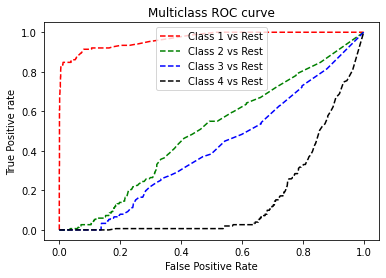

In [ ]:
from sklearn.metrics import roc_curve, auc
pred_prob = rf_clf.predict_proba(X_test_sca_fs)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}



n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i]= roc_curve(y_test_T, pred_prob[:,i], pos_label=1)

# print(tpr)    
 
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 1 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 2 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 3 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='black', label='Class 4 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=200);    


# GridSearchCV

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
grid_search_clf = GridSearchCV(rf, {'n_estimators': [200,100,150]},cv=5)
grid_search_clf.fit(X_train, y_train)

NameError: ignored

In [ ]:
grid_search_clf.cv_results_

In [ ]:
#merge 
frames = [X_train,test_df]

result = pd.concat(frames)
result.shape

In [ ]:
frames = [y_train,y_test]

target_df = pd.concat(frames)
target_df.shape

In [ ]:
target_df.value_counts()

In [ ]:
sns.countplot(target_df.Target)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_M, X_test_M, y_train_M, y_test_M = train_test_split(result, target_df, test_size=0.4, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_M, y_train_M)

In [ ]:
#feature scaling on training data
from sklearn.preprocessing import MinMaxScaler
#scaler = StandardScaler()
scaler = MinMaxScaler()
X_train_sca_fs = scaler.fit_transform(X_train_sm)
X_test_sca_fs = scaler.transform(X_test_M) 
#print(X_train_sca_fs)

In [ ]:
from sklearn import tree

#training
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_sca_fs,y_train_sm)

# making predictions on the testing set
y_pred_dt = clf.predict(X_test_sca_fs)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Decision Tree model accuracy(in %):", metrics.accuracy_score(y_test_M, y_pred_dt)*100)

print(metrics.classification_report(y_test_M, y_pred_dt))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_M,y_pred_dt)

In [ ]:
from sklearn import svm
clf_svm = svm.SVC(kernel='rbf')
clf_svm.fit(X_train_sca_fs,y_train_sm)

y_pred_svm = clf_svm.predict(X_test_sca_fs)

from sklearn import metrics
print("SVM model accuracy(in %):", metrics.accuracy_score(y_test_M, y_pred_svm)*100)

print(metrics.classification_report(y_test_M, y_pred_svm))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_M,y_pred_svm)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=200,random_state=0)
rf_clf_sca = rf_clf.fit(X_train_sca_fs,y_train_sm)

y_pred_rf_sca = rf_clf_sca.predict(X_test_sca_fs)

from sklearn import metrics
print("RF model accuracy(in %):", metrics.accuracy_score(y_test_M, y_pred_rf_sca)*100)

print(metrics.classification_report(y_test_M, y_pred_rf_sca))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_M,y_pred_rf_sca)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix


gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train_sca_fs, y_train_sm)
predictions = gb_clf2.predict(X_test_sca_fs)

print("Confusion Matrix:")
print(confusion_matrix(y_test_M, predictions))

print("Classification Report")
print(metrics.classification_report(y_test_M, predictions))